In [1]:
import matplotlib.pyplot as plt
import qutip as qp
import numpy as np
from H_generator import H_generator
from QuIPI_circuit import QuIPI_circuit

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Inilization

In [3]:
H_gen = H_generator() # Hamiltonian generator

In [4]:
QC = QuIPI_circuit() # quantum circuit
s = 10 # squeezing factor
cut = 20
max_cut = 100
QC.set_qumode_para(s, cut, max_cut)
N = 3 # number of qubits

# Process

In [5]:
a = np.ones(N)
J = np.ones((N,N))
shift_E = 3.7
H = H_gen.build_Ising_model(N, a, J, shift_E) # Hamiltonian
h_list = H_gen.Ising_model_decomposition(N, a, J, shift_E) # local operator
E_exact = H.eigenenergies()[0] - shift_E # exact ground state energy

b = qp.tensor([qp.sigmaz()*qp.snot()*qp.basis(2)]*N) # initial state

S_list = np.arange(25, 200, 5) # Trotter step list
K = 3 # Iteration step

In [6]:
E_est_list = [] # store the approximate ground energy
for S in S_list:
    E_list, state_list = QC.Trotter_evolution(H, h_list, b, K, S)
    E_est_list.append(E_list[-1] - shift_E)
E_est_error = abs(np.array(E_est_list) - E_exact)

In [8]:
np.save('Ising_one_Trotter_E_vs_S.npy', [S_list, E_est_error])

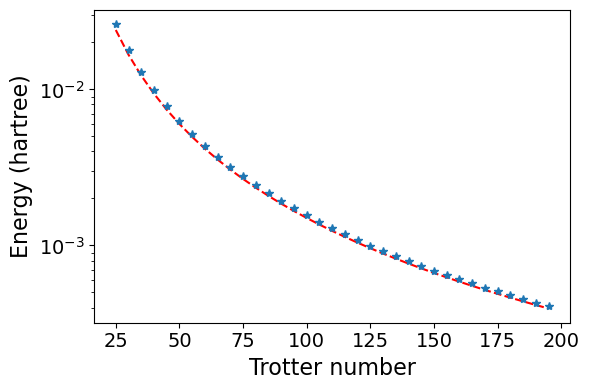

In [12]:
fig=plt.figure(figsize=[6,4])
plt.plot(S_list,15/S_list**2,'r--')
plt.plot(S_list, E_est_error,'*')
plt.xlabel("Trotter number",fontsize=16)
plt.ylabel("Energy (hartree)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')

plt.tight_layout()
plt.show()